# **Lenguaje de Señas (Numeros)**

# Manipulacion de Datos

In [ ]:
!pip install Pillow


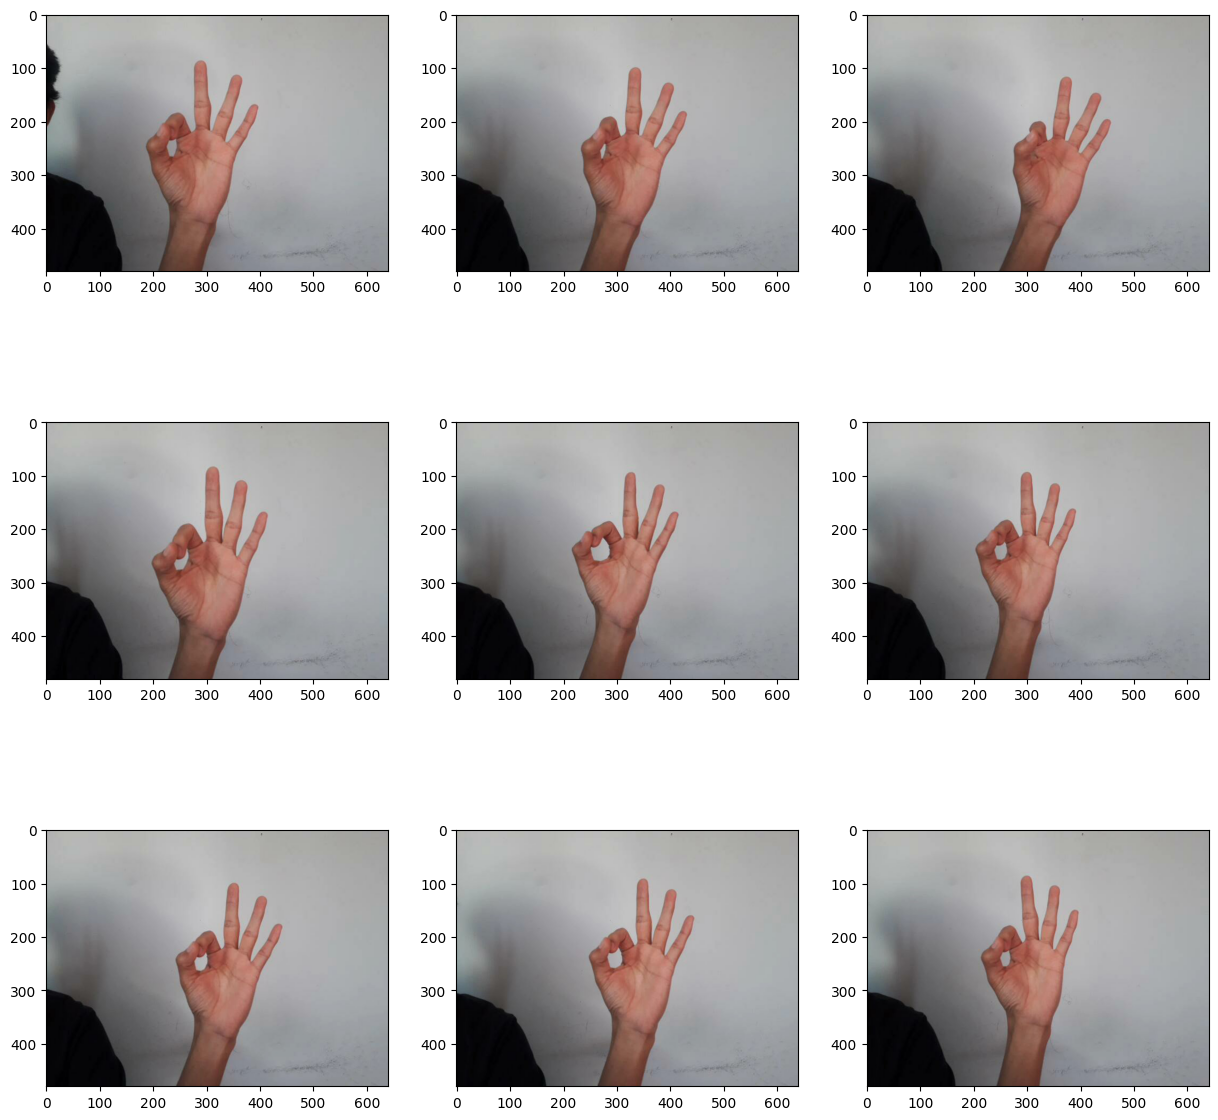

In [1]:
#Mostrar algunas imagenes
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta = '/content/drive/MyDrive/Colab Notebooks/Datos/Numeros/9'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:9]):
  plt.subplot(3,3,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

In [39]:
from PIL import Image
import os

In [ ]:
# Ruta de la carpeta con las imágenes originales
ruta_carpeta_original = '/content/drive/MyDrive/Colab Notebooks/Datos/Numeros'

# Ruta de la carpeta donde guardar las imágenes recortadas
ruta_carpeta_recortada = '/content/drive/MyDrive/Colab Notebooks/Datos/Entrenamiento'


In [ ]:
def recortar_imagenes_en_carpeta(carpeta_original, carpeta_recortada):
    for clase in os.listdir(carpeta_original):
        carpeta_clase_original = os.path.join(carpeta_original, clase)
        carpeta_clase_recortada = os.path.join(carpeta_recortada, clase)

        # Crear la carpeta para las imágenes recortadas de la clase si no existe
        if not os.path.exists(carpeta_clase_recortada):
            os.makedirs(carpeta_clase_recortada)

        for nombre_archivo in os.listdir(carpeta_clase_original):
            ruta_archivo_original = os.path.join(carpeta_clase_original, nombre_archivo)

            # Verificar si es un archivo de imagen (por ejemplo, jpg, png)
            if os.path.isfile(ruta_archivo_original) and nombre_archivo.lower().endswith(('.jpg', '.jpeg', '.png')):

                imagen = Image.open(ruta_archivo_original)

                # Obtener las dimensiones de la imagen
                ancho, alto = imagen.size

                # Calcular las coordenadas para el recorte
                tamanio_corte = min(ancho, alto)
                coordenadas_corte = ((ancho - tamanio_corte) // 2, (alto - tamanio_corte) // 2, (ancho + tamanio_corte) // 2, (alto + tamanio_corte) // 2)

                # Recortar la imagen
                imagen_recortada = imagen.crop(coordenadas_corte)

                # Guardar la imagen recortada en la carpeta de destino
                ruta_archivo_recortado = os.path.join(carpeta_clase_recortada, nombre_archivo)
                imagen_recortada.save(ruta_archivo_recortado)

                # Cerrar la imagen original
                imagen.close()



In [ ]:
# Llamar a la función para recortar las imágenes en la carpeta
recortar_imagenes_en_carpeta(ruta_carpeta_original, ruta_carpeta_recortada)

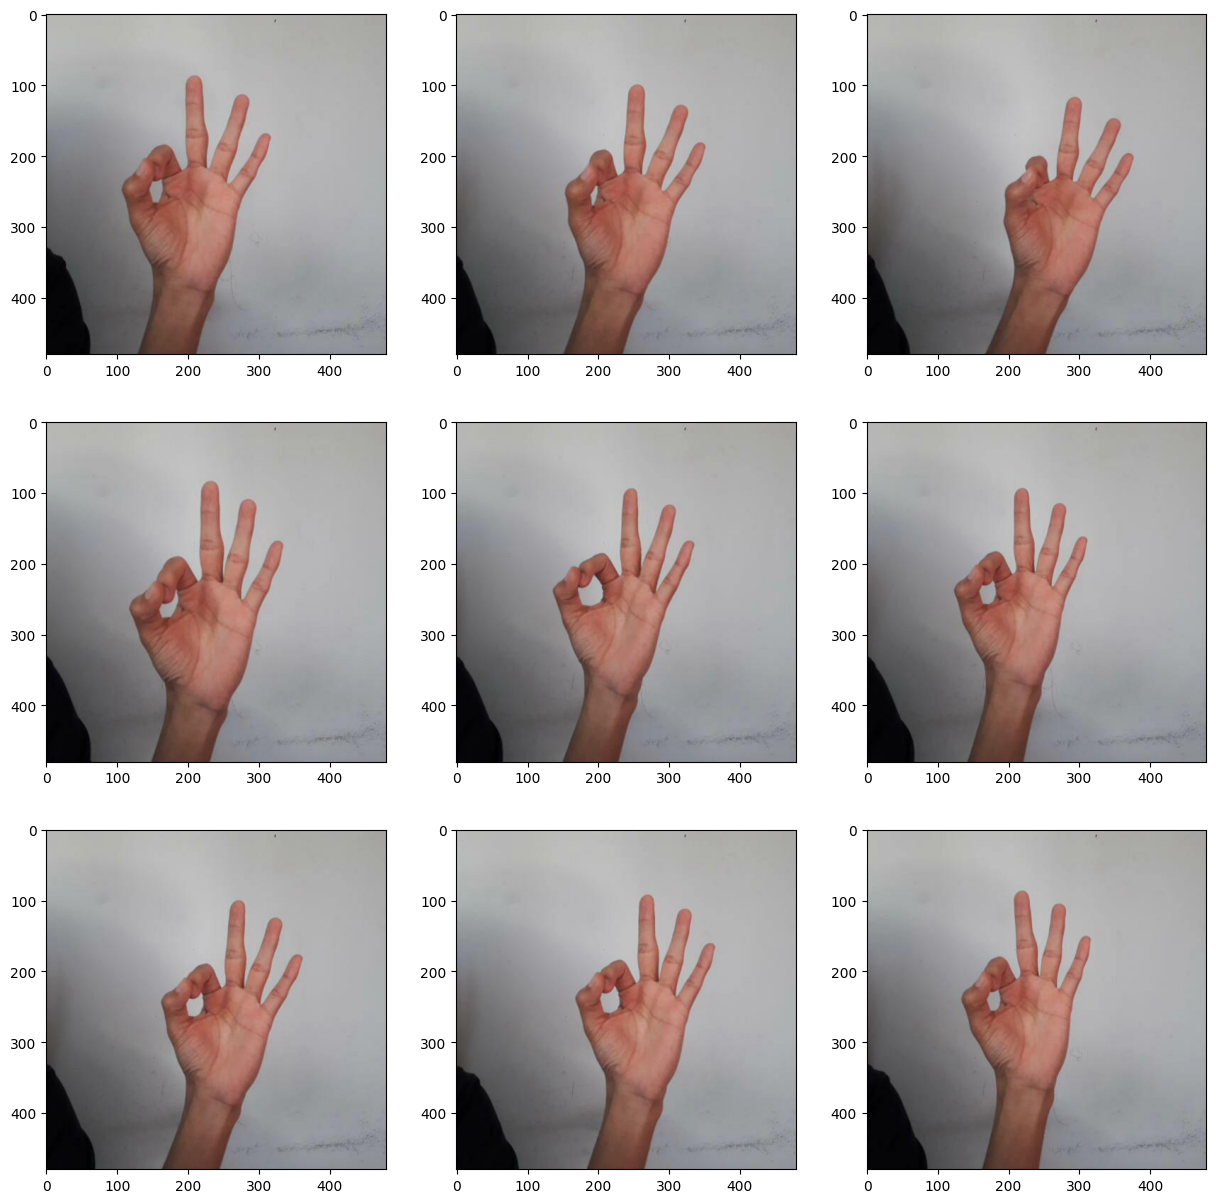

In [ ]:
#Mostrar algunas imagenes (Recortadas)
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta = '/content/drive/MyDrive/Colab Notebooks/Datos/Entrenamiento/9'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:9]):
  plt.subplot(3,3,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

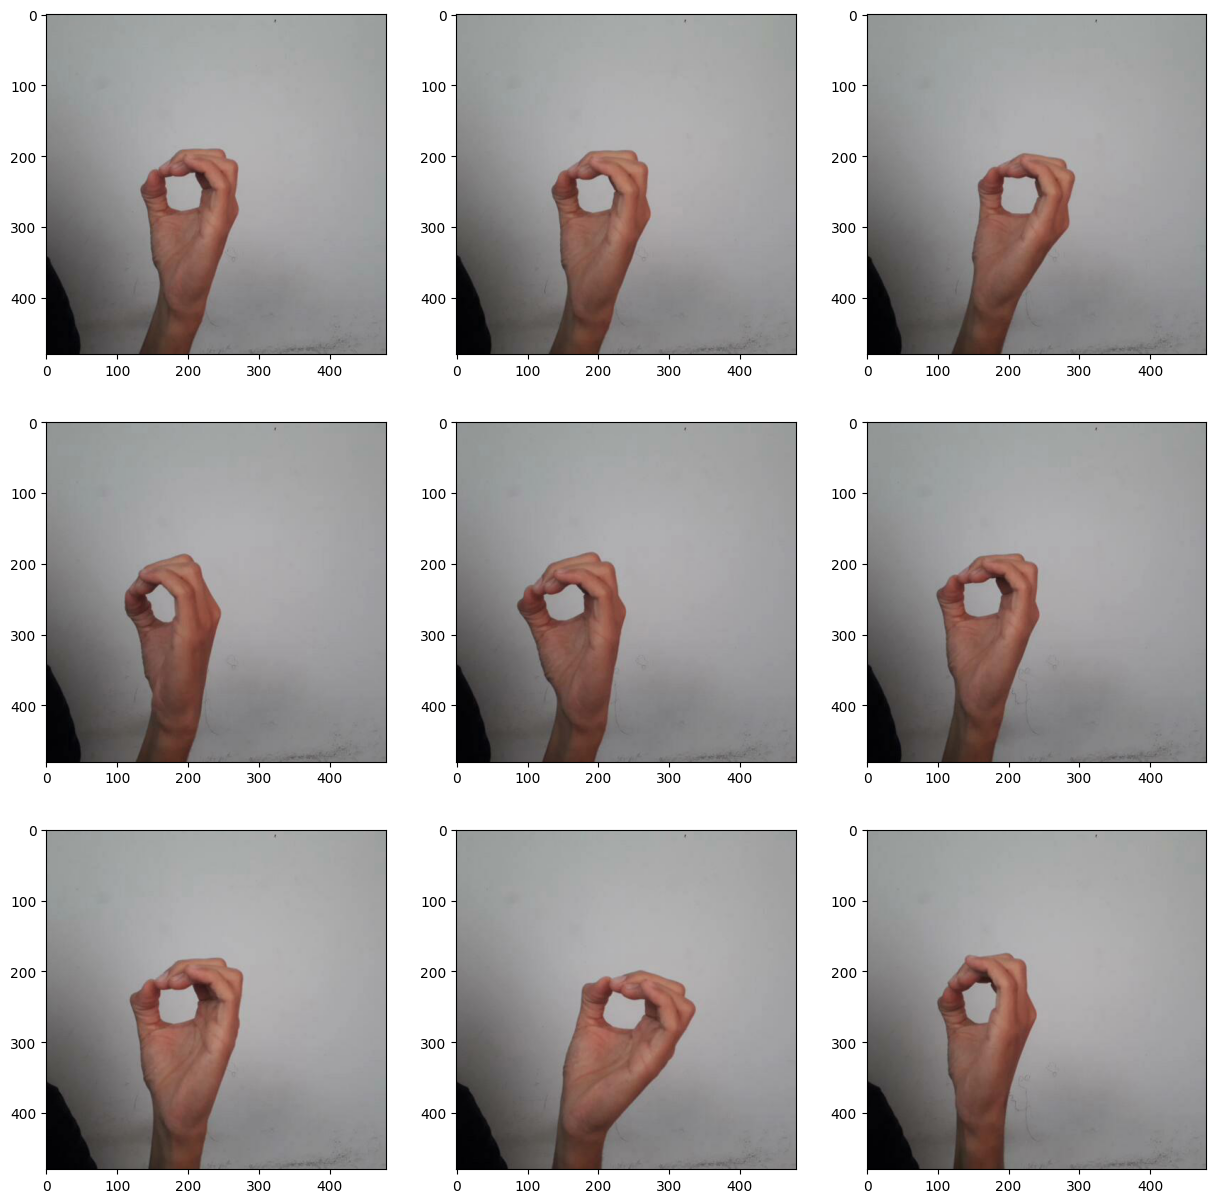

In [ ]:
#Mostrar algunas imagenes
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta = '/content/drive/MyDrive/Colab Notebooks/Datos/Entrenamiento/0'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:9]):
  plt.subplot(3,3,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

#------Modelo 1------

In [ ]:
#Set de datos con ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#Crear el dataset generador
datagen = ImageDataGenerator(
    rescale=1. / 255,
    #zoom_range = [0.5, 1.5],
    validation_split=0.20 #20% para pruebas
)

In [ ]:
#Generadores para sets de entrenamiento y pruebas
data_gen_train = datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Datos/Entrenamiento', target_size=(224,224),
                                                     batch_size=16, shuffle=True, subset='training')
data_gen_test = datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Datos/Entrenamiento', target_size=(224,224),
                                                     batch_size=16, shuffle=True, subset='validation')

Found 3200 images belonging to 10 classes.
Found 800 images belonging to 10 classes.


In [ ]:
#Descargar el Modelo 1
import tensorflow as tf
import tensorflow_hub as hub

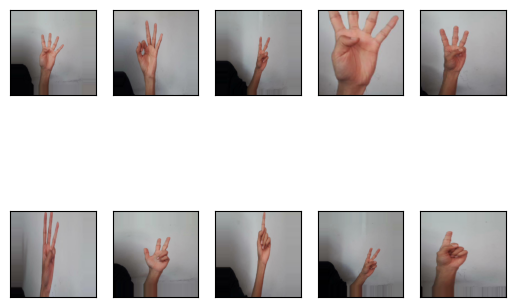

In [ ]:
import matplotlib.pyplot as plt
#Imprimir 10 imagenes del generador de entrenamiento
for imagen, etiqueta in data_gen_train:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()

In [ ]:
#Definicion de modelo
modelo1 = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", input_shape=(224,224,3),trainable = False),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
modelo1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_5 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_3 (Dense)             (None, 10)                12810     
                                                                 
Total params: 2,270,794
Trainable params: 12,810
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
#Compilar
modelo1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenamiento

In [ ]:
#Entrenar el modelo
EPOCAS = 3

historial = modelo1.fit(
    data_gen_train, epochs=EPOCAS, batch_size=16,
    validation_data=data_gen_test
)

Epoch 1/3
200/200 [==============================] - 226s 1s/step - loss: 0.9189 - accuracy: 0.7756 - val_loss: 0.4024 - val_accuracy: 0.9475
Epoch 2/3
200/200 [==============================] - 216s 1s/step - loss: 0.3292 - accuracy: 0.9494 - val_loss: 0.2801 - val_accuracy: 0.9375
Epoch 3/3
200/200 [==============================] - 255s 1s/step - loss: 0.2013 - accuracy: 0.9694 - val_loss: 0.1816 - val_accuracy: 0.9700


# Metricas Modelo 1

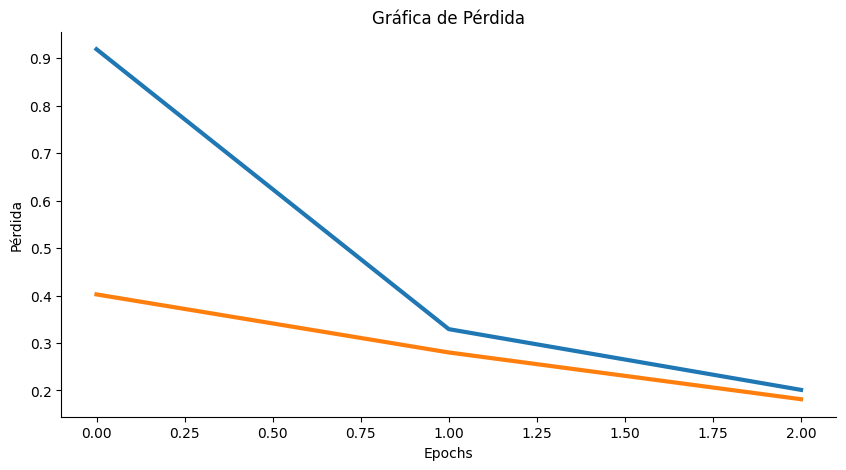

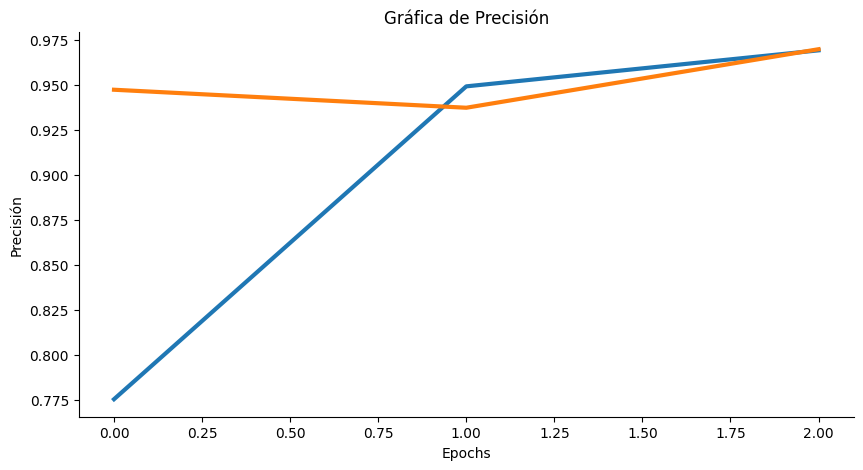

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

loss = pd.DataFrame(historial.history)

# Crear figura para la gráfica de pérdida
plt.figure(figsize=(10, 5))
sns.lineplot(data=loss['loss'], lw=3)
sns.lineplot(data=loss['val_loss'], lw=3)
plt.title('Gráfica de Pérdida')
plt.xlabel('Epochs')
plt.ylabel('Pérdida')
sns.despine()

# Crear figura para la gráfica de precisión
plt.figure(figsize=(10, 5))
sns.lineplot(data=loss['accuracy'], lw=3)
sns.lineplot(data=loss['val_accuracy'], lw=3)
plt.title('Gráfica de Precisión')
plt.xlabel('Epochs')
plt.ylabel('Precisión')
sns.despine()

plt.show()

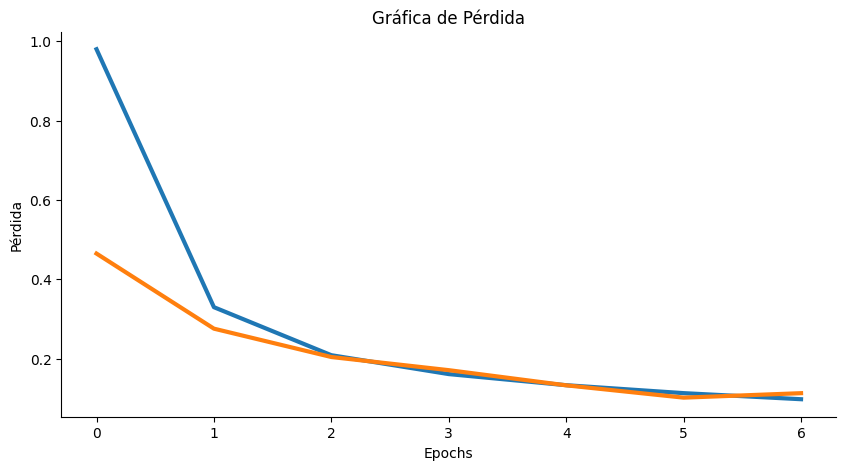

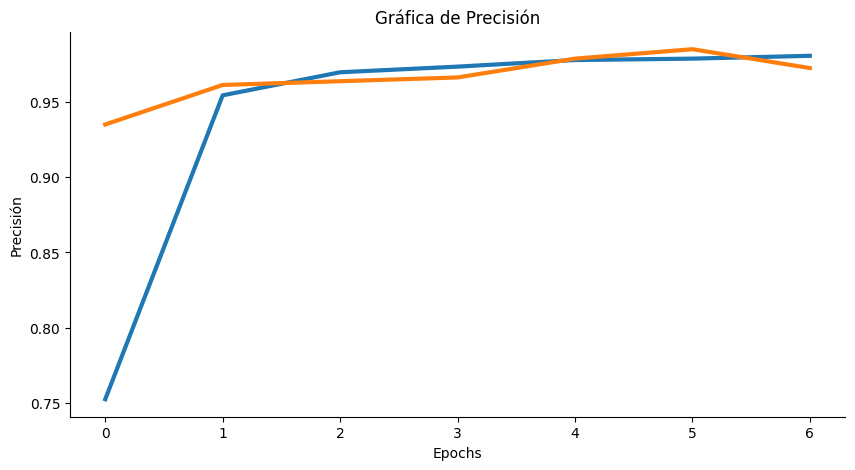

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

loss = pd.DataFrame(historial.history)

# Crear figura para la gráfica de pérdida
plt.figure(figsize=(10, 5))
sns.lineplot(data=loss['loss'], lw=3)
sns.lineplot(data=loss['val_loss'], lw=3)
plt.title('Gráfica de Pérdida')
plt.xlabel('Epochs')
plt.ylabel('Pérdida')
sns.despine()

# Crear figura para la gráfica de precisión
plt.figure(figsize=(10, 5))
sns.lineplot(data=loss['accuracy'], lw=3)
sns.lineplot(data=loss['val_accuracy'], lw=3)
plt.title('Gráfica de Precisión')
plt.xlabel('Epochs')
plt.ylabel('Precisión')
sns.despine()

plt.show()

# Matriz de confusión

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
width_shape = 224
height_shape = 224
batch_size = 16

names = ['0','1','2','3','4','5','6','7','8','9']

In [ ]:
test_data_dir = '/content/drive/MyDrive/Colab Notebooks/Datos/Digitos'

test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(width_shape, height_shape),
    batch_size = batch_size,
    class_mode='categorical',
    shuffle=False)

predictions = modelo1.predict_generator(generator=test_generator)

y_pred = np.argmax(predictions, axis=-1)
y_real = test_generator.classes

Found 2062 images belonging to 10 classes.


<ipython-input-40-ecadb043b49a>:12: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = modelo1.predict_generator(generator=test_generator)


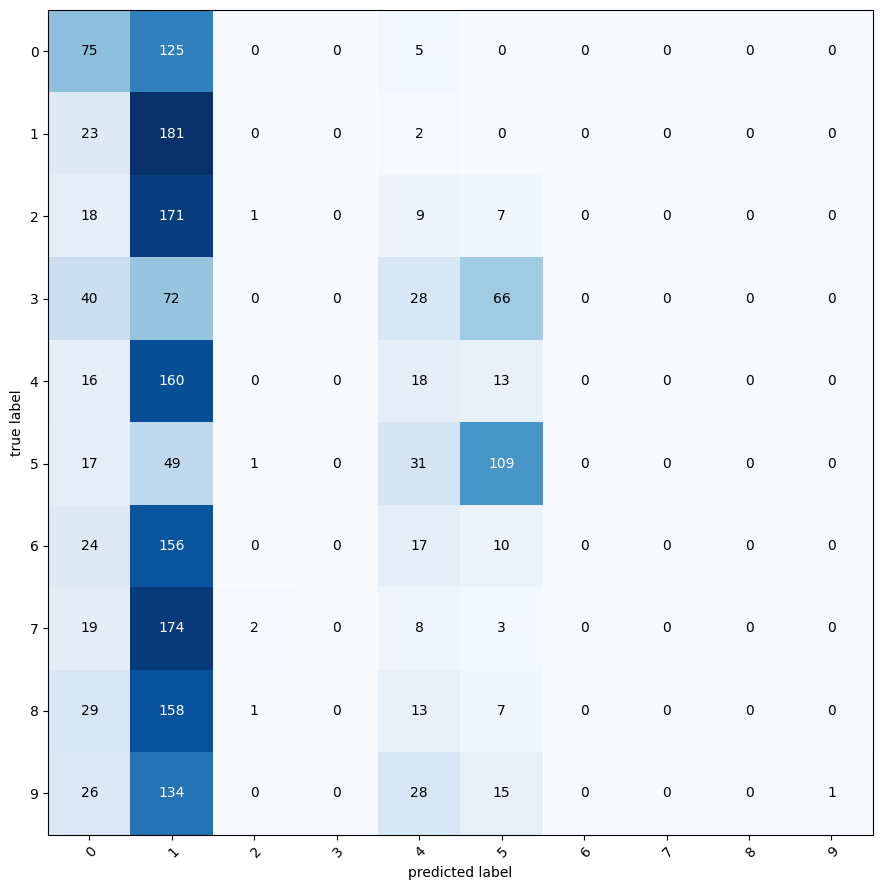

In [ ]:
matc=confusion_matrix(y_real, y_pred)

plot_confusion_matrix(conf_mat=matc, figsize=(9,9), class_names = names, show_normed=False)
plt.tight_layout()

In [ ]:
predictions = modelo1.predict_generator(data_gen_test)

y_pred = np.argmax(predictions, axis=-1)
y_real = data_gen_test.classes

<ipython-input-72-5e7bb62e68f0>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = modelo1.predict_generator(data_gen_test)


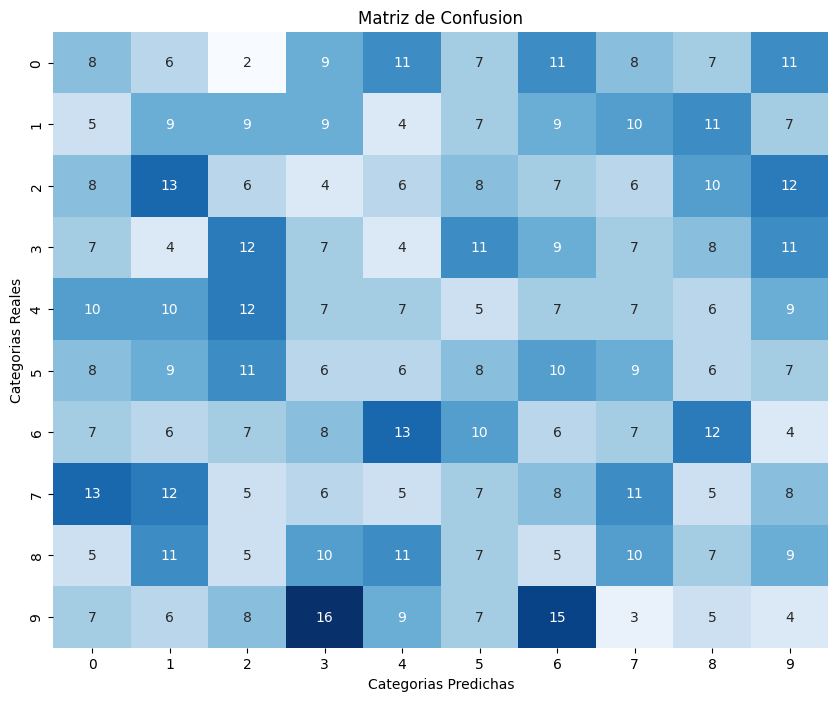

In [ ]:
conf_matrix = confusion_matrix(y_real,y_pred )
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Categorias Predichas')
plt.ylabel('Categorias Reales')
plt.title('Matriz de Confusion')
plt.show()

In [ ]:
print(metrics.classification_report(y_real,y_pred, digits = 4))

              precision    recall  f1-score   support

           0     0.1000    0.1000    0.1000        60
           1     0.1333    0.1333    0.1333        60
           2     0.0667    0.0667    0.0667        60
           3     0.0794    0.0833    0.0813        60
           4     0.0820    0.0833    0.0826        60
           5     0.0833    0.0833    0.0833        60
           6     0.0333    0.0333    0.0333        60
           7     0.1111    0.1167    0.1138        60
           8     0.0377    0.0333    0.0354        60
           9     0.0500    0.0500    0.0500        60

    accuracy                         0.0783       600
   macro avg     0.0777    0.0783    0.0780       600
weighted avg     0.0777    0.0783    0.0780       600



# Exportar modelo 1

In [ ]:
#Guardar Modelo
modelo1.save("modeloNum4.h5")

#------Modelo 2------

# Librerias

In [2]:
# importamos librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import skimage
from skimage.transform import resize

# tensorflow / keras
import tensorflow as tf
from tensorflow import keras
import os

In [3]:
batch_size = 32
imageSize = 224
target_dims = (imageSize, imageSize, 3)
num_classes = 10

train_len = 4000
train_dir = '/content/drive/MyDrive/Colab Notebooks/Datos/Entrenamiento/'

def get_data(folder):
    X = np.empty((train_len, imageSize, imageSize, 3), dtype=np.float32)
    y = np.empty((train_len,), dtype=int)
    cnt = 0
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['0']:
                label = 0
            elif folderName in ['1']:
                label = 1
            elif folderName in ['2']:
                label = 2
            elif folderName in ['3']:
                label = 3
            elif folderName in ['4']:
                label = 4
            elif folderName in ['5']:
                label = 5
            elif folderName in ['6']:
                label = 6
            elif folderName in ['7']:
                label = 7
            elif folderName in ['8']:
                label = 8
            elif folderName in ['9']:
                label = 9
            else:
                label = 10
            for image_filename in os.listdir(folder + folderName):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                    img_arr = np.asarray(img_file).reshape((-1, imageSize, imageSize, 3))

                    X[cnt] = img_arr
                    y[cnt] = label
                    cnt += 1
    return X,y
X_train, y_train = get_data(train_dir)

In [4]:
print("La forma de X_train es : ", X_train.shape)
print("La forma de y_train es : ", y_train.shape)

La forma de X_train es :  (4000, 224, 224, 3)
La forma de y_train es :  (4000,)


In [5]:
print("La forma de una imagen es: ", X_train[0].shape)

La forma de una imagen es:  (224, 224, 3)


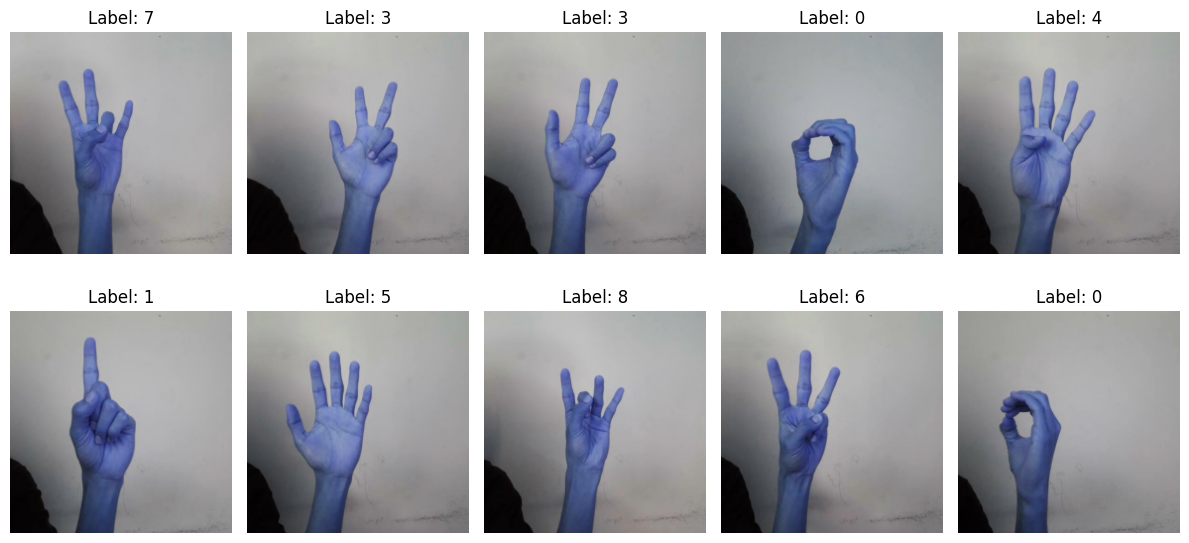

In [11]:
random_indices = np.random.randint(0, len(X_train), 10)
plt.figure(figsize=(12, 6))

for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[idx])
    plt.title('Label: {}'.format(y_train[idx]))
    plt.axis('off')

plt.tight_layout()
plt.show()

In [12]:
X_data = X_train
y_data = y_train

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3,random_state=42,stratify=y_data)

In [14]:
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_cat_train.shape)
print(y_cat_test.shape)

(2800, 224, 224, 3)
(2800,)
(1200, 224, 224, 3)
(1200,)
(2800, 10)
(1200, 10)


In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten

In [ ]:
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 220, 220, 32)      2432      
                                                                 
 activation_3 (Activation)   (None, 220, 220, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 activation_4 (Activation)   (None, 108, 108, 64)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                  

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamiento

In [ ]:
model.fit(X_train, y_cat_train,
          epochs=30,
          batch_size=64,
          verbose=2,
          validation_data=(X_test, y_cat_test),
         callbacks=[early_stop])

Epoch 1/30
44/44 - 369s - loss: 2.3154 - accuracy: 0.1471 - val_loss: 2.0568 - val_accuracy: 0.3167 - 369s/epoch - 8s/step
Epoch 2/30
44/44 - 359s - loss: 1.3760 - accuracy: 0.5446 - val_loss: 0.9557 - val_accuracy: 0.7050 - 359s/epoch - 8s/step
Epoch 3/30
44/44 - 358s - loss: 0.6358 - accuracy: 0.7882 - val_loss: 0.4930 - val_accuracy: 0.8517 - 358s/epoch - 8s/step
Epoch 4/30
44/44 - 361s - loss: 0.3059 - accuracy: 0.9068 - val_loss: 0.2999 - val_accuracy: 0.9092 - 361s/epoch - 8s/step
Epoch 5/30
44/44 - 363s - loss: 0.1402 - accuracy: 0.9604 - val_loss: 0.2650 - val_accuracy: 0.9192 - 363s/epoch - 8s/step
Epoch 6/30
44/44 - 359s - loss: 0.0889 - accuracy: 0.9746 - val_loss: 0.3556 - val_accuracy: 0.8883 - 359s/epoch - 8s/step
Epoch 7/30
44/44 - 359s - loss: 0.0942 - accuracy: 0.9736 - val_loss: 0.2622 - val_accuracy: 0.9225 - 359s/epoch - 8s/step
Epoch 8/30
44/44 - 362s - loss: 0.0391 - accuracy: 0.9918 - val_loss: 0.2172 - val_accuracy: 0.9392 - 362s/epoch - 8s/step
Epoch 9/30
44/44

# Metricas Modelo 2

In [ ]:
metrics = pd.DataFrame(model.history.history)
print("Las métricas del modelo son")
metrics

The model metrics are


,loss,accuracy,val_loss,val_accuracy
0,2.315354,0.147143,2.056790,0.316667
1,1.376035,0.544643,0.955698,0.705000
2,0.635779,0.788214,0.492953,0.851667
3,0.305943,0.906786,0.299944,0.909167
4,0.140176,0.960357,0.265043,0.919167
5,0.088910,0.974643,0.355592,0.888333
6,0.094228,0.973571,0.262214,0.922500
7,0.039123,0.991786,0.217242,0.939167
8,0.017289,0.996071,0.482561,0.885833
9,0.060467,0.980714,0.279691,0.924167


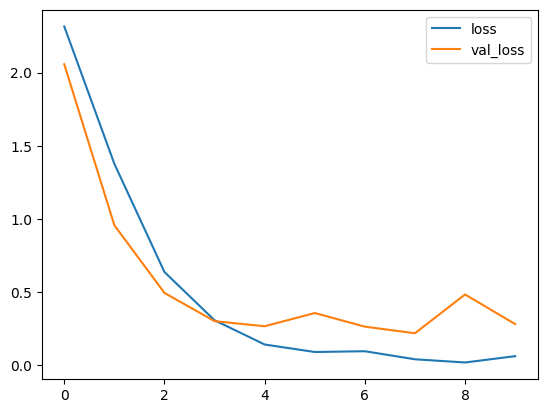

In [ ]:
metrics[['loss','val_loss']].plot()
plt.show()

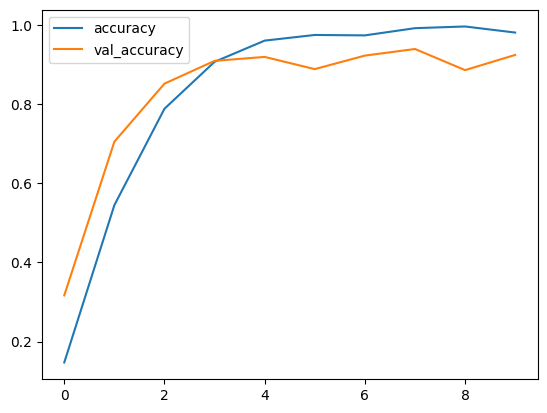

In [ ]:
metrics[['accuracy','val_accuracy']].plot()
plt.show()

In [ ]:
predictions = model.predict_generator(X_test)
print("Predicciones realizadas...")

<ipython-input-71-adc76d8c9bb0>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(X_test)


Predicciones realizadas...


In [ ]:
y_pred = np.argmax(predictions, axis=-1)

# Matriz de confusión

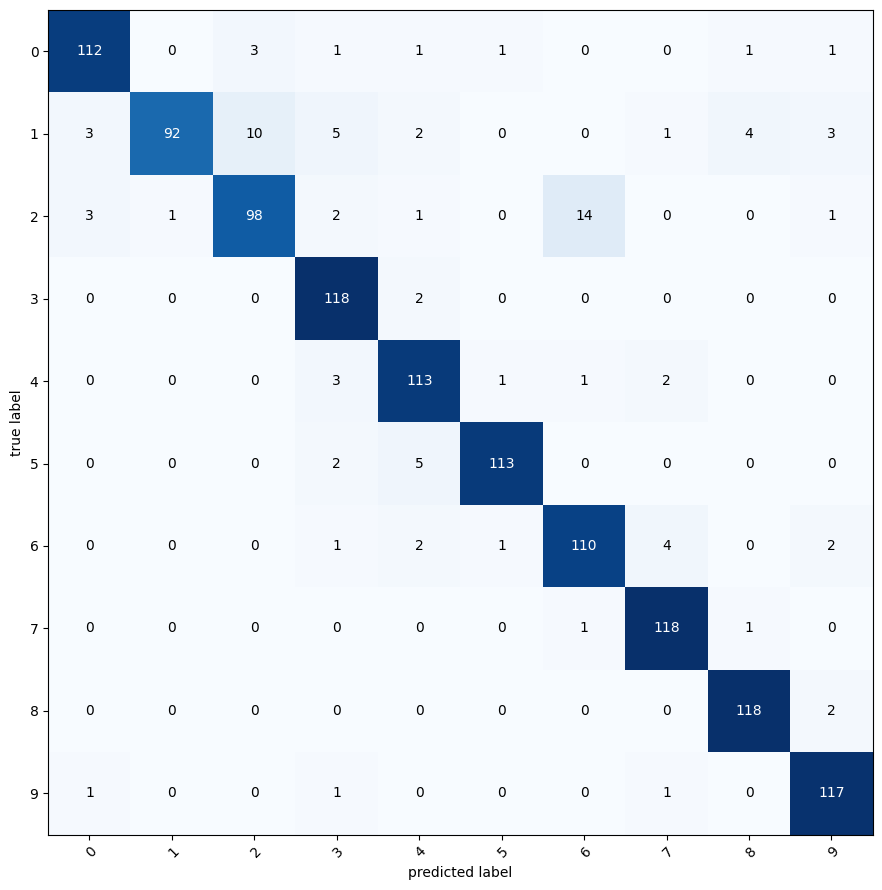

In [ ]:
names = ['0','1','2','3','4','5','6','7','8','9']
from mlxtend.plotting import plot_confusion_matrix
matc=confusion_matrix(y_test,y_pred)

plot_confusion_matrix(conf_mat=matc, figsize=(9,9), class_names = names, show_normed=False)
plt.tight_layout()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       120
           1       0.99      0.77      0.86       120
           2       0.88      0.82      0.85       120
           3       0.89      0.98      0.93       120
           4       0.90      0.94      0.92       120
           5       0.97      0.94      0.96       120
           6       0.87      0.92      0.89       120
           7       0.94      0.98      0.96       120
           8       0.95      0.98      0.97       120
           9       0.93      0.97      0.95       120

    accuracy                           0.92      1200
   macro avg       0.93      0.92      0.92      1200
weighted avg       0.93      0.92      0.92      1200



# Pruebas Modelo 2

In [ ]:
#Categorizar una imagen de internet
from PIL import Image
import requests
from io import BytesIO
import cv2

def categorizar(url):
  respuesta = requests.get(url)
  img = Image.open(BytesIO(respuesta.content))
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  prediccion = modelo1.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediccion[0], axis=-1)

In [ ]:
#Debe ser 1
url = 'https://img.freepik.com/foto-gratis/primer-plano-mano-apuntando-arriba_23-2147795486.jpg?w=740&t=st=1689697097~exp=1689697697~hmac=14bb4628d252f6f03026dcce1ba754aaf816453b75b1449077c6ee199f7c8432' #debe ser 2
prediccion = categorizar (url)
print(prediccion)

1/1 [==============================] - 1s 579ms/step
1


In [ ]:
#Debe ser 9
url = 'https://previews.123rf.com/images/darakchi/darakchi1610/darakchi161000034/67576902-el-n%C3%BAmero-nueve-en-el-lenguaje-de-se%C3%B1as-americano-asl-como-se-muestra-con-una-mano-y-los-dedos.jpg' #debe ser 2
prediccion = categorizar (url)
print(prediccion)

1/1 [==============================] - 0s 63ms/step
9


In [ ]:
#Debe ser 9
url = 'https://previews.123rf.com/images/darakchi/darakchi1610/darakchi161000034/67576902-el-n%C3%BAmero-nueve-en-el-lenguaje-de-se%C3%B1as-americano-asl-como-se-muestra-con-una-mano-y-los-dedos.jpg' #debe ser 2
prediccion = categorizar (url)
print(prediccion)

1/1 [==============================] - 0s 94ms/step
9


In [ ]:
#Debe ser 6
url = 'https://media.baamboozle.com/uploads/images/102823/1600179326_5398'
prediccion = categorizar (url)
print(prediccion)

1/1 [==============================] - 0s 100ms/step
6


In [ ]:
from tensorflow.keras.preprocessing import image

def predict_image(model, image_path):
    # Cargar la imagen y preprocesarla para que coincida con el formato de entrada del modelo
    img = image.load_img(image_path, target_size=(224, 224))  # Ajusta el tamaño según la entrada del modelo
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalizar la imagen entre 0 y 1

    # Realizar la predicción con el modelo
    prediction = model.predict(img_array)

    # Obtener la clase predicha
    predicted_class_index = np.argmax(prediction, axis=1)[0]

    # Aquí necesitarías tener un diccionario que mapee el índice de clase a su nombre o etiqueta
    class_labels = {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9'}  # Ajustar según tus clases

    predicted_class_label = class_labels[predicted_class_index]

    return predicted_class_label

In [ ]:
image_path = "/content/drive/MyDrive/Colab Notebooks/Datos/Numeros/7/WIN_20230720_14_58_03_Pro.jpg"
predict_image(modelo1, image_path)

1/1 [==============================] - 1s 927ms/step


'7'

In [ ]:
#Debe ser 2
image_path = "/content/drive/MyDrive/Colab Notebooks/Datos/Digitos/2/IMG_1140.JPG"
predict_image(modelo1, image_path)

1/1 [==============================] - 0s 60ms/step


'6'

In [ ]:
#Debe ser 5
image_path = "/content/drive/MyDrive/Colab Notebooks/Datos/Digitos/5/IMG_1153.JPG"
predict_image(modelo1, image_path)

1/1 [==============================] - 0s 62ms/step


'5'

In [ ]:
#Debe ser 6
image_path = "/content/drive/MyDrive/Colab Notebooks/Datos/Digitos/6/IMG_1185.JPG"
predict_image(modelo1, image_path)

1/1 [==============================] - 0s 66ms/step


'6'

# Exportar modelo 2

In [ ]:
model.save('ASL2.h5')